In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings('ignore')

PATH = ''

tweet_df = pd.read_csv(PATH)

In [ ]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (892907, 14)
Columns are: Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username',
       'Verified Status', 'Follower Count', 'Location', 'Reply Counts',
       'Retweet Counts', 'Like Count', 'Media', 'Keyword', 'Year'],
      dtype='object')


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892907 entries, 0 to 892906
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       892907 non-null  int64  
 1   Datetime         892902 non-null  object 
 2   Tweet Id         892899 non-null  object 
 3   Text             892899 non-null  object 
 4   Username         892886 non-null  object 
 5   Verified Status  892879 non-null  object 
 6   Follower Count   892881 non-null  float64
 7   Location         702922 non-null  object 
 8   Reply Counts     892876 non-null  float64
 9   Retweet Counts   892865 non-null  object 
 10  Like Count       892864 non-null  float64
 11  Media            191059 non-null  object 
 12  Keyword          892907 non-null  object 
 13  Year             892907 non-null  int64  
dtypes: float64(3), int64(2), object(9)
memory usage: 95.4+ MB


In [ ]:
'''
Checking for missing values and duplicates
'''
tweet_df.isnull().sum()

Unnamed: 0              0
Datetime                5
Tweet Id                8
Text                    8
Username               21
Verified Status        28
Follower Count         26
Location           189985
Reply Counts           31
Retweet Counts         42
Like Count             43
Media              701848
Keyword                 0
Year                    0
dtype: int64

In [ ]:
tweet_df.dropna(subset=['Text'])

Unnamed: 0                   Datetime             Tweet Id  \
0                0  2018-01-01 23:59:45+00:00   947980695502192641   
1                1  2018-01-01 23:56:23+00:00   947979850966556673   
2                2  2018-01-01 23:56:06+00:00   947979779122352128   
3                3  2018-01-01 23:55:08+00:00   947979533969444866   
4                4  2018-01-01 23:55:01+00:00   947979508103176193   
...            ...                        ...                  ...   
892902       23177  2021-12-31 12:00:35+00:00  1476885997380059155   
892903       23178  2021-12-31 11:12:29+00:00  1476873891654029317   
892904       23179  2021-12-31 09:07:23+00:00  1476842407660457985   
892905       23180  2021-12-31 05:47:10+00:00  1476792021402546178   
892906       23181  2021-12-31 03:00:02+00:00  1476749964625784842   

                                                                                                                                                                                                                                                                                                                 Text  \
0                                                                                                                 This will be good for ALL green spaces accross London. Lambeth Council: Pledge to keep Brockwell Park events sustainable and proportionate - Sign the Peti... https://t.co/WKZagmHz8M via @UKChange   
1                                                                                                                                                  "MSC: There are more than 20K MSC labelled, certified sustainable seafood products." https://t.co/nb9jeqOkzU #climatechange #climateaction https://t.co/8gQdzLY7Ab   
2                                                                                                                               #happynewyear @LeftyWilliams42 Thx for following @planetmediazone, a #Denver based, #green, #ecofriendly &amp; #sustainable #webdesign studio. #HappyHolidays https://t.co/7AHBfxwg7h   
3                                                                  Intern with us! Sustainable Tallahassee is looking for two outstanding students to join us for the Spring 2018 semester.\nContact volunteer@sustainabletallahassee.org for info. @fsusustainable @SustainFAMU #Tallahassee https://t.co/T2ciGG9Td8   
4                                                                                                                                                                                        Discover the best sustainable fashion books and download a free worksheet on starting a sustainable  https://t.co/u9gBRWqbJE   
...                                                                                                                                                                                                                                                                                                               ...   
892902                     As the world starts to work towards becoming more #carbonneutral and the implementation of new laws or requirements come into play, it will be important to already have a head start on any potential #compliance needs. \nRead our blog: https://t.co/ESTw3sJJgy https://t.co/raLUvBXyRc   
892903                                              #NFT tickets available via #Phantasma for the Chris Jericho AMA on January 4th, discussing his upcoming graphic novel release #NFTs based on his Painmaker character !\n\nhttps://t.co/z71vOP0D07\n\n#smartNFT #carbonneutral #blockchain https://t.co/bQxocwDG0s   
892904  For saving energy and reducing emissions, protecting the environment,  INTCO's Zhenjiang production base has introduced the most advanced photovoltaic equipment to replace traditional coal energy with solar energy. \nhttps://t.co/lh8EzHuJw4\n#intco #intcomedical #carbonneutral https://t.co/JL4DLOzrUF   
892905                               

In [ ]:
tweet_df.Text.sample(1,random_state=5595)

309395    @clairermassey Sadly his domain is disappearing fast, because of mankind's stupidity about global warming. 🤔😡😪
Name: Text, dtype: object

In [ ]:
tweet_df.Text = tweet_df.Text.str.strip()
tweet_df = tweet_df.replace(r'^s*$', float('NaN'), regex = True) 
tweet_df = tweet_df.dropna(subset=['Datetime','Text','Like Count','Retweet Counts','Follower Count','Tweet Id'])
tweet_df.isnull().sum()

In [ ]:
tweet_df.Text.iloc[9716]

'@BardLackey @deadrody @aSinister @CharlesDarwinTX @AltUS_ARC @BubbasRanch @SombreGreen @JamesRider3 @6lennybravo @AltUsarc @AgtRigor @GeraldKutney @PAlterBoy1 @DrinkinAbraham @caerbannog666 @SteveSGoddard @turningabout @jontheharris @VeryHarmless @RushhourP @rln_nelson @MrCalmonsense @StormSignalSA @heyeokah @stevenmosher @SteveP34881829 @BobGreene333 @symk @RobbCab @YorksJAT @TheClimateHawk @CrispyCX @ladyspat1 @Tangomitteckel @redforged42 @Kaessa @lghcox @ClimateVoters @miked194765 @glinch72 @DBater2 @1_TMF_ @GlytchMeister @mkemp278 @priscian @theOnionPirate @MacCutcheonD @EC_Kosters @StorySlug @IbachPeter How did you find out about the base on the moon?\n\nYou are supposed to be distracted by the climate hoax.'

## Drop Rows with length less than 30

In [ ]:
# Drop rows with str length less than 10
# indexNames = tweet_df[ tweet_df['Text'].str.len() <= 31 ].index
tweet_df.drop( tweet_df[ tweet_df['Text'].str.len() <= 30 ].index , inplace=True)

Int64Index([   78,   799,   955,  2215,  2449,  3446,  3487,  3545,  3607,
             3707,
            ...
            76067, 76426, 77027, 77073, 77086, 77158, 77263, 77481, 77487,
            77694],
           dtype='int64', length=251)

In [ ]:
from zmq.constants import NULL

## Drop non english rows
from langdetect import detect

# tweet_df['detect'] = 'nan'
for i in range(len(tweet_df)):
  print(i)
  try:  
        lang = detect(tweet_df.iloc[i].Text)
        tweet_df.at[i,'detect'] = lang
  except Exception:
      pass


In [ ]:
df = tweet_df[tweet_df['detect'] == 'en']
df = df.dropna(subset=['Datetime','Text','Like Count','Retweet Counts','Follower Count','Tweet Id'])

In [ ]:
df.sample(5)

Datetime             Tweet Id  \
48958  2021-06-05 17:21:52+00:00  1401227785193111559   
20130  2019-10-30 21:38:56+00:00  1189657966900699136   
28729  2020-01-26 15:43:44+00:00  1221458708976361472   
60442  2019-08-28 20:53:35+00:00  1166816117731577857   
54354  2021-12-05 10:03:20+00:00  1467434407208259585   

                                                                                                                                                                                                                                                                                                                               Text  \
48958                                                                                                                                                                Next thing is to stop consumers paying extra to brand the products they buy...climatebrawl climatechange CLIMATEHOAX climatecrisis ClimateCult ClimateAction     
20130                                                                                                                                                   That's why they changed it to a Climate Change crisis.  That way they have all of the bases covered and we can all freak out no matter what the weather does.   ClimateHoax   
28729                                      Nee met mensen die nog weten te verwoorden wat er op hoofdlijnen verkeerd gast en direct moet veranderen zoals prof. Berkhout hier doet.   Hoe kan iemand in het licht van zulke massale boskap nog voor rutte zijn, dat begrijp ik niet. Helaas is er geen een reeel groen alternatief.   
60442                                                                           Watch 0:54  "I'm environmentalist" but ClimateChangeHoax     It's unbelievable that a Head of State can't give a simple answer without showing his bigotry, poor language, and actually without answering the question without his AlternativeFacts   
54354                                                                                                                                                                                            Alan Jones, Peta Credlin Expose Climate Hoax With A Bowl Of Rice And The Suspension Of Reason And Accountability - New Matilda -     

           Username Verified Status  Follower Count                 Location  \
48958  insane_voice           False           573.0         Always QUESTION    
20130    _OneTruth_           False          1318.0            United States   
28729  Leenderheide           False           586.0  Leenderheide, Eindhoven   
60442       emmifdz           False           183.0                   Mexico   
54354   WizePenguin           False          3499.0       AUSTRALIA Tasmania   

       Reply Counts  Retweet Counts  Like Count Media            Keyword  \
48958           0.0             0.0         1.0   NaN        climatehoax   
20130           0.0             1.0         3.0   NaN        climatehoax   
28729           0.0             0.0         0.0   NaN        climatehoax   
60442           0.0             0.0         0.0   NaN  climatechangehoax   
54354           0.0             0.0         0.0   NaN        climatehoax   

         Year detect  
48958  2021.0     en  
20130  2019.0     en  
28729  2020.0     en  
60442  2019.0     en  
54354  2021.0     en

In [ ]:
df = df.drop_duplicates(subset=['Text'])

In [ ]:
df['Text'].duplicated().sum()

0

In [ ]:
tweet_df.sample(5,random_state=388).Text

53741                                                                                                                                                                 @toryboypierce @BorisJohnson Bullshit. Its the border fiasco and the climate hoax
31207          @Fietsreiziger @ThomasW78445173 @ExtinctionR Very interesting language to describe a 40% error... "worse than THOUGHT" 😳\n"worse... than previously BELIEVED" 😵\n#climatebrawl #climatechange #CLIMATEHOAX 😂 😂 😂 https://t.co/sEngprZwR5
63731                                                                                                   Just wanna say you MoFo’s running the weather #TickTock are dispicable #ClimateChangeHoax Karma will get you in the end https://t.co/Tat2DfzoIz
59426    One law for the rich and another for the poor...\n\n"A-listers flock to Google summit in private jets and mega yachts while going to talk climate change"\n\nhttps://t.co/ZsQ4smjyuC\n\n#ClimateChangeHoax #ClimateChangeIsReal #ClimateChange
17031   

In [ ]:
# Remove emojis, escape characters and any non-ascii characters
def clean_data(dataframe):
#replace URL of a text
    dataframe['Text'] = dataframe['Text'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
    dataframe['Text'] = dataframe['Text'].str.replace('&amp[;]?', 'and')
    dataframe['Text'] = dataframe['Text'].str.replace('@[^\s]+',' ')
    dataframe['Text'] = dataframe['Text'].str.replace('#','')
    dataframe['Text'] = dataframe['Text'].str.replace('\n',' ')

clean_data(tweet_df)

In [ ]:
filter_char = lambda c: ord(c) < 256
tweet_df['Text'] = tweet_df['Text'].apply(lambda s: ''.join(filter(filter_char, s)))

In [ ]:
tweet_df.sample(5,random_state=388).Text

53741                                                                                                                                                               Bullshit. Its the border fiasco and the climate hoax
31207                                                        Very interesting language to describe a 40% error... "worse than THOUGHT"  "worse... than previously BELIEVED"  climatebrawl climatechange CLIMATEHOAX     
63731                                                                                             Just wanna say you MoFos running the weather TickTock are dispicable ClimateChangeHoax Karma will get you in the end  
59426    One law for the rich and another for the poor...  "A-listers flock to Google summit in private jets and mega yachts while going to talk climate change"     ClimateChangeHoax ClimateChangeIsReal ClimateChange
17031                                                                                         Natural news isn't news: "Impeachment 

In [ ]:
tweet_df

Datetime             Tweet Id  \
0      2018-01-01 23:24:24+00:00   947971801971412992   
1      2018-01-01 21:56:56+00:00   947949787504107525   
2      2018-01-01 21:50:35+00:00   947948192980717569   
3      2018-01-01 21:38:23+00:00   947945121777115136   
4      2018-01-01 21:35:41+00:00   947944442438221826   
...                          ...                  ...   
77710  2021-12-27 10:38:15+00:00  1475415724982214659   
77711  2021-12-29 18:03:21+00:00  1476252513166835717   
77712  2021-12-30 22:47:59+00:00  1476686531070943234   
77713  2021-12-30 12:09:05+00:00  1476525747233689608   
77714  2021-12-31 00:05:33+00:00  1476706051726757889   

                                                                                                                                                                                                                                             Text  \
0                                                                                                                                                                                        Based on science?  No way. climatechange climatehoax       
1                                                                                                                                                                 Another new book out about the climate hoax. Sorry but I cant recall the author   
2                                        Not sure who she is, but if shes a reporter, and has no skin thick enough, shes just not good enough for her job. Its a two-way Street, no matter how rude. Must be friend of the climate hoax minister.   
3                                                                                                                                                                                      Climate HOAX brought to  you by the satanists from Hell!     
4                                                                                                                                                                       CLIMATE HOAX, they are using technology to freeze and heat. HAARP and       
...                                                                                                                                                                                                                                           ...   
77710                                                                                                                                    If addressing the ClimateChangeHoax was profitable, Fauci and Pfizer would create a methane vaccination.   
77711                                                                                                                                                                                                                           ClimateChangeHoax   
77712      The great thing about the human condition is the fact that we get bored very quickly. This means we are so over climatechangehoax covidhysteria identitypolitics genderconfusion transgendernonsense lets get out and enjoy our lives.   
77713  Heavy rain from 4AM to 11 AM in Bodfish, CA. The storm came from the north. Starting around 3AM the storm comes in a straightline North East. HAARP is being used to modify weather. ClimateChangeHoax HAARP ImpeachBidenHarrisPelosiNOW     
77714                                                                                                                                                                                                                           ClimateChangeHoax   

             Username Verified Status  Follower Count        Location  \
0         signpost365           False           824.0           Texas   
1         RoutTheHand           False          3714.0             USA   
2        canuck_dutch           False            47.0             NaN   
3        TamiFriedman           False          1373.0     undisclosed   
4        TamiFriedman           F

In [ ]:
filepath = 'drive/Shareddrives/Capstone/dataset/'
tweet_df['Text'].to_csv(filepath + 'tweet_data.csv', index=False)

In [ ]:
filepath = 'drive/Shareddrives/Capstone/dataset/'
df.to_csv(filepath + 'data.csv', index=False)
df['Text'].to_csv(filepath+'text.csv', index=False)

In [ ]:
df  = pd.DataFrame(tweet_df[['Tweet Id', 'Text']])

(-0.5, 399.5, 199.5, -0.5)

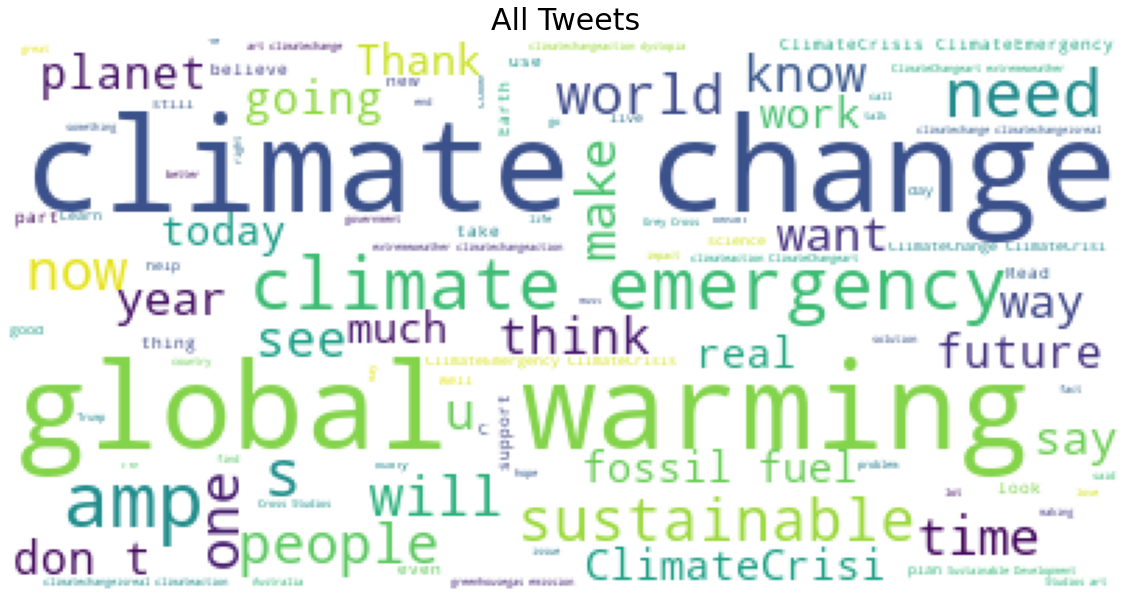

In [ ]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
tweet_All = " ".join(review for review in df.Text)


fig, ax = plt.subplots(figsize  = (20,20))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)


# Display the generated image:
ax.imshow(wordcloud_ALL)
ax.set_title('All Tweets', fontsize=30)
ax.axis('off')


Number of tweets by keyword

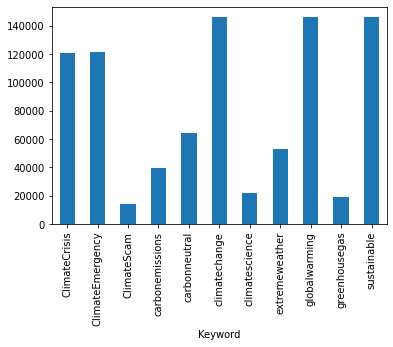

In [ ]:
tweet_df.groupby(by='Keyword').size().plot(kind='bar')
# look into when the keywords with less tweets spiked on a monthly basis

Distribution of # of Tweets gather by Year and Keyword

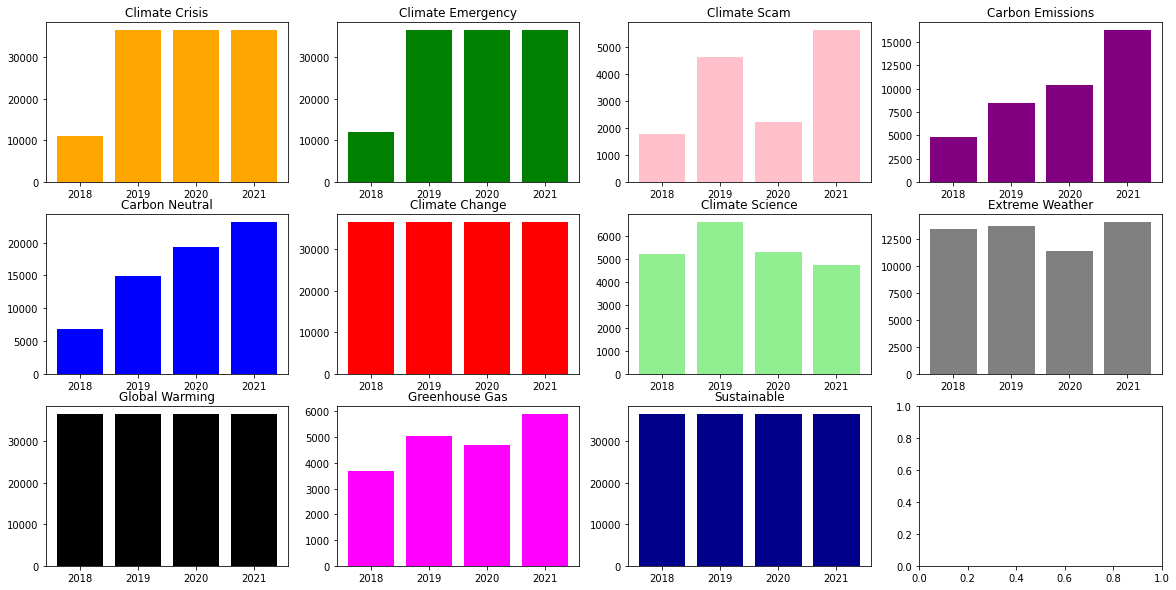

In [ ]:
tab = (tweet_df.groupby(['Keyword','Year']).size()).to_frame().reset_index()
tab = tab.rename(columns={0:'Count'})

fig, axs = plt.subplots(3,4,figsize=(20,10))
axs[0,0].bar(tab[0:4].Year,tab[0:4].Count, color='orange')
axs[0,0].set_title("Climate Crisis")
axs[0,1].bar(tab[4:8].Year,tab[4:8].Count , color='green')
axs[0,1].set_title("Climate Emergency") 
axs[0,2].bar(tab[8:12].Year,tab[8:12].Count, color='pink')
axs[0,2].set_title("Climate Scam") 
axs[0,3].bar(tab[12:16].Year,tab[12:16].Count, color='purple') 
axs[0,3].set_title("Carbon Emissions")
axs[1,0].bar(tab[16:20].Year,tab[16:20].Count, color='blue') 
axs[1,0].set_title("Carbon Neutral")
axs[1,1].bar(tab[20:24].Year,tab[20:24].Count, color='red')
axs[1,1].set_title("Climate Change") 
axs[1,2].bar(tab[24:28].Year,tab[24:28].Count, color='lightgreen')
axs[1,2].set_title("Climate Science")
axs[1,3].bar(tab[28:32].Year,tab[28:32].Count, color='gray')
axs[1,3].set_title("Extreme Weather")  
axs[2,0].bar(tab[32:36].Year,tab[32:36].Count, color='black') 
axs[2,0].set_title("Global Warming")
axs[2,1].bar(tab[36:40].Year,tab[36:40].Count, color='magenta') 
axs[2,1].set_title("Greenhouse Gas")
axs[2,2].bar(tab[40:44].Year,tab[40:44].Count, color='darkblue')
axs[2,2].set_title("Sustainable")
 
plt.bar()


plt.show()

Average length of tweets for each Keyword

In [ ]:
import plotly.express as px
df = (tweet_df.groupby('Keyword')['Text']
                            .apply(lambda x: np.mean(x.str.len()))
                            .reset_index(name='Average Text Length'))

fig = px.bar(df, x='Keyword', y='Average Text Length', color="Keyword")
fig.show()